# Capstone Project Template
- You may use this template to structure your Capstone Project in Jupyter Notebook.
- Feel free to add or remove sections as needed based on your project scope.
- You are encouraged to include code cells, Markdown explanations, charts, and summaries to clearly demonstrate your analytical thinking and process.

## 1️⃣ Project Title and Introduction:

Give your project a meaningful title. Then briefly describe the context or background of your analysis.

## 2️⃣ Scoping Your Data Analysis Project

- What are the big questions that you are exploring?
- What are the datasets and data columns that you will be exploring?
- What relationships between the data columns will you be exploring?

## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (e.g., missing prices, order dates, or last visit dates).




In [ ]:
# import all libraries into python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the datasets
appearances_df = pd.read_csv("appearances.csv")
players_df = pd.read_csv("players.csv", encoding='latin-1')

In [ ]:
# Choose the columns to drop
appearances_df = appearances_df.drop(columns=['ownGoals', 'xGoalsChain', 'positionOrder', 'xGoalsBuildup', 'keyPasses', 'xAssists'])
appearances_df.shape

(356513, 13)

In [ ]:
appearances_df.head()

,gameID,playerID,goals,shots,xGoals,assists,position,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0.0,0,GK,0,0,90.0,0,0,1
1,81,557,0,0,0.0,0,DR,0,0,NaN,222605,0,1
2,81,548,0,0,0.0,0,DC,0,0,90.0,0,0,1
3,81,628,0,0,0.0,0,DC,0,0,90.0,0,0,1
4,81,1006,0,0,0.0,0,DL,0,0,90.0,0,0,1


In [ ]:
players_df.head()

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


In [ ]:
# Data Cleaning for appearances dataset

# Drop duplicates
duplicates_appearances = appearances_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_appearances}")

if duplicates_appearances > 0:
    print("Duplicates row found")
    display(appearances_df[appearances_df.duplicated(keep=False)])

# Check for missing value
appearances_df.info()
appearances_df.isnull().sum()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   shots          356513 non-null  int64  
 4   xGoals         320862 non-null  float64
 5   assists        356513 non-null  int64  
 6   position       356513 non-null  object 
 7   yellowCard     356513 non-null  int64  
 8   redCard        356513 non-null  int64  
 9   time           320862 non-null  float64
 10  substituteIn   356513 non-null  int64  
 11  substituteOut  356513 non-null  int64  
 12  leagueID       356513 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ MB


,0
gameID,0
playerID,0
goals,0
shots,0
xGoals,35651
assists,0
position,0
yellowCard,0
redCard,0
time,35651


In [ ]:
# Resolve the missing value from appearances dataset
# Missing values in 'xGoals' were filled with 0 because xG = 0 indicates no scoring chance.
# 'Time Played' filled with median to preserve distribution without biasing extremes.
appearances_df['xGoals'] = appearances_df['xGoals'].fillna(0)
appearances_df['time'] = appearances_df['time'].fillna(appearances_df['time'].median())

# Rename the columns
appearances_df = appearances_df.rename(columns={
    'gameID': 'Game ID', 'playerID': 'Player ID', 'goals': 'Goals', 'shots': 'Shots', 'position': 'Position', 'yellowCard': 'Yellow Card', 'redCard': 'Red Card',
    'xGoals': 'Expected Goals','time': 'Time Played', 'substituteIn': 'Substitute In', 'substituteOut': 'Substitute Off', 'leagueID': 'League ID', 'assists': 'Assists'
})

appearances_df.head()

,Game ID,Player ID,Goals,Shots,Expected Goals,Assists,Position,Yellow Card,Red Card,Time Played,Substitute In,Substitute Off,League ID
0,81,560,0,0,0.0,0,GK,0,0,90.0,0,0,1
1,81,557,0,0,0.0,0,DR,0,0,90.0,222605,0,1
2,81,548,0,0,0.0,0,DC,0,0,90.0,0,0,1
3,81,628,0,0,0.0,0,DC,0,0,90.0,0,0,1
4,81,1006,0,0,0.0,0,DL,0,0,90.0,0,0,1


In [ ]:
# Data Cleaning for players dataset

# Drop duplicates
duplicates_players = players_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_players}")

if duplicates_players > 0:
    print("Duplicates row found")
    display(players_df[players_df.duplicated(keep=False)])

# Check for missing value
players_df.info()
players_df.isnull().sum()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  7659 non-null   int64 
 1   name      7659 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.8+ KB


,0
playerID,0
name,0


In [ ]:
# Rename the columns
players_df = players_df.rename(columns={
    'name': 'Player Name', 'playerID': 'Player ID'
})

players_df.head()

,Player ID,Player Name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis



In [ ]:
# Converting into correct data types
appearances_df['Goals'] = appearances_df['Goals'].astype(int)
appearances_df['Shots'] = appearances_df['Shots'].astype(int)
appearances_df['Time Played'] = appearances_df['Time Played'].astype(int)
appearances_df['Yellow Card'] = appearances_df['Yellow Card'].astype(int)
appearances_df['Red Card'] = appearances_df['Red Card'].astype(int)
appearances_df['Assists'] = appearances_df['Assists'].astype(int)
appearances_df['Expected Goals'] = appearances_df['Expected Goals'].astype(float).round(3)

players_df['Player ID'] = players_df['Player ID'].astype(int)
players_df['Player Name'] = players_df['Player Name'].astype(str)

In [ ]:
# To keep valid range in the dataset
appearances_df = appearances_df[(appearances_df[['Goals', 'Shots']] >= 0).all(axis=1)]
appearances_df = appearances_df[(appearances_df['Time Played'] >= 0) & (appearances_df['Time Played'] <= 120)]

In [ ]:
# Customize new calculated column
appearances_df['Goal Efficiency'] = (appearances_df['Goals'] / appearances_df['Time Played']) * 90
appearances_df['Goal Efficiency'] = appearances_df['Goal Efficiency'].fillna(0)

appearances_df['xG Difference'] = appearances_df['Goals'] - appearances_df['Expected Goals']

appearances_df['Goal Contribution'] = appearances_df['Goals'] + appearances_df['Assists']

appearances_df.head()

,Game ID,Player ID,Goals,Shots,Expected Goals,Assists,Position,Yellow Card,Red Card,Time Played,Substitute In,Substitute Off,League ID,Goal Efficiency,xG Difference,Goal Contribution
0,81,560,0,0,0.0,0,GK,0,0,90,0,0,1,0.0,0.0,0
1,81,557,0,0,0.0,0,DR,0,0,90,222605,0,1,0.0,0.0,0
2,81,548,0,0,0.0,0,DC,0,0,90,0,0,1,0.0,0.0,0
3,81,628,0,0,0.0,0,DC,0,0,90,0,0,1,0.0,0.0,0
4,81,1006,0,0,0.0,0,DL,0,0,90,0,0,1,0.0,0.0,0


In [ ]:
# Formatting categorical values
players_df = players_df.dropna(subset=['Player Name'])
players_df['Player Name'] = players_df['Player Name'].str.strip().str.title()

### Data Joining:

- Join the datasets using a unique identifier.
- Perform groupby to uncover relationships between variables.


In [ ]:
# Merge datasets on playerID
merged_df = appearances_df.merge(players_df, on='Player ID', how='left')

# Inspect merged data
print("Merged dataset shape:", merged_df.shape)
print("Columns after merge:", merged_df.columns.tolist())
merged_df.head()

Merged dataset shape: (356513, 17)
Columns after merge: ['Game ID', 'Player ID', 'Goals', 'Shots', 'Expected Goals', 'Assists', 'Position', 'Yellow Card', 'Red Card', 'Time Played', 'Substitute In', 'Substitute Off', 'League ID', 'Goal Efficiency', 'xG Difference', 'Goal Contribution', 'Player Name']


,Game ID,Player ID,Goals,Shots,Expected Goals,Assists,Position,Yellow Card,Red Card,Time Played,Substitute In,Substitute Off,League ID,Goal Efficiency,xG Difference,Goal Contribution,Player Name
0,81,560,0,0,0.0,0,GK,0,0,90,0,0,1,0.0,0.0,0,Sergio Romero
1,81,557,0,0,0.0,0,DR,0,0,90,222605,0,1,0.0,0.0,0,Matteo Darmian
2,81,548,0,0,0.0,0,DC,0,0,90,0,0,1,0.0,0.0,0,Daley Blind
3,81,628,0,0,0.0,0,DC,0,0,90,0,0,1,0.0,0.0,0,Chris Smalling
4,81,1006,0,0,0.0,0,DL,0,0,90,0,0,1,0.0,0.0,0,Luke Shaw


In [ ]:
# Rearrange column position
merged_df = merged_df[
    [
        'Player Name','Player ID', 'Position', 'Game ID', 'League ID', 'Shots', 'Goals', 'Expected Goals', 'Goal Efficiency',
        'xG Difference', 'Assists', 'Goal Contribution', 'Yellow Card', 'Red Card', 'Time Played', 'Substitute In', 'Substitute Off'
    ]
]

merged_df.isnull().sum()

,0
Player Name,0
Player ID,0
Position,0
Game ID,0
League ID,0
Shots,0
Goals,0
Expected Goals,0
Goal Efficiency,0
xG Difference,0


In [ ]:
merged_df.head()

,Player Name,Player ID,Position,Game ID,League ID,Shots,Goals,Expected Goals,Goal Efficiency,xG Difference,Assists,Goal Contribution,Yellow Card,Red Card,Time Played,Substitute In,Substitute Off
0,Sergio Romero,560,GK,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
1,Matteo Darmian,557,DR,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,222605,0
2,Daley Blind,548,DC,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
3,Chris Smalling,628,DC,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
4,Luke Shaw,1006,DL,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0


## 4️⃣ Exploratory Data Analysis

1.   List item
2.   List item



### Descriptive Analysis:

- Explore overall descriptive analysis.
- Filter subsets to answer big questions.

In [ ]:
# 1) Keep raw for reference
# Define the mapping
position_map = {
    'GK': 'Goalkeeper', 'DR': 'Defender', 'DC': 'Defender', 'DL': 'Defender', 'DMC': 'Midfielder', 'DMR': 'Midfielder', 'DML': 'Midfielder',
    'MR': 'Midfielder', 'MC': 'Midfielder', 'ML': 'Midfielder', 'AMR': 'Midfielder', 'AMC': 'Midfielder', 'AML': 'Midfielder', 'FWR': 'Forward',
    'FWL': 'Forward', 'FW': 'Forward', 'Sub': 'Substitute'
}

# Replace abbreviations with full names
merged_df['Position'] = merged_df['Position'].replace(position_map)

# Check the result
print(merged_df['Position'].unique())

merged_df.head()

['Goalkeeper' 'Defender' 'Midfielder' 'Forward' 'Substitute']


,Player Name,Player ID,Position,Game ID,League ID,Shots,Goals,Expected Goals,Goal Efficiency,xG Difference,Assists,Goal Contribution,Yellow Card,Red Card,Time Played,Substitute In,Substitute Off
0,Sergio Romero,560,Goalkeeper,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
1,Matteo Darmian,557,Defender,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,222605,0
2,Daley Blind,548,Defender,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
3,Chris Smalling,628,Defender,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0
4,Luke Shaw,1006,Defender,81,1,0,0,0.0,0.0,0.0,0,0,0,0,90,0,0


In [ ]:
# Summarise statistics for numerical variable

# Basic overview
print("Dataset Shape:", merged_df.shape)
print("\nData Types:\n", merged_df.dtypes)

# 1. Dropping categorical column (not need for statistics summary)
categorical_data = merged_df.drop(columns = ["Player Name", "Position", "Player ID", "Game ID", "League ID"])

# 2. Keep numerical column only
numerical_columns = categorical_data.select_dtypes(include = 'number')

# 3. Get summary statistics
merged_summary = numerical_columns.describe()

# 4. Display the result for statistical summary
print("\nSummarization Statistics for Numerical Data: ")
print(merged_summary)

Dataset Shape: (356513, 17)

Data Types:
 Player Name           object
Player ID              int64
Position              object
Game ID                int64
League ID              int64
Shots                  int64
Goals                  int64
Expected Goals       float64
Goal Efficiency      float64
xG Difference        float64
Assists                int64
Goal Contribution      int64
Yellow Card            int64
Red Card               int64
Time Played            int64
Substitute In          int64
Substitute Off         int64
dtype: object

Summarization Statistics for Numerical Data: 
               Shots          Goals  Expected Goals  Goal Efficiency  \
count  356513.000000  356513.000000   356513.000000    356513.000000   
mean        0.886447       0.094574        0.087166         0.160413   
std         1.270494       0.329592        0.215090         1.525262   
min         0.000000       0.000000        0.000000         0.000000   
25%         0.000000       0.000000        0

In [ ]:
active_players = merged_df[merged_df['Time Played'] > 0]
print("Active players:", active_players.shape)

Active players: (356513, 17)


In [ ]:
# Top Scorers and Assist Providers (per Position)
merged_df.groupby('Position')[['Goals','Assists','Shots','Expected Goals']].mean().round(3)

,Goals,Assists,Shots,Expected Goals
Position,,,,
Defender,0.036,0.042,0.463,0.036
Forward,0.321,0.123,2.240,0.294
Goalkeeper,0.000,0.002,0.002,0.000
Midfielder,0.106,0.102,1.205,0.096
Substitute,0.052,0.033,0.473,0.049


In [ ]:
#Top 10 Players by Goals
top_scorers = merged_df.groupby('Player Name')['Goals'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Players by Total Goals:\n", top_scorers)


Top 10 Players by Total Goals:
 Player Name
Lionel Messi                 231
Cristiano Ronaldo            215
Robert Lewandowski           203
Luis Suárez                  173
Harry Kane                   163
Pierre-Emerick Aubameyang    149
Ciro Immobile                133
Edinson Cavani               132
Sergio Agüero                132
Mohamed Salah                130
Name: Goals, dtype: int64


### Data Visualisation:
- Visualise data in graphs to better understand the data.

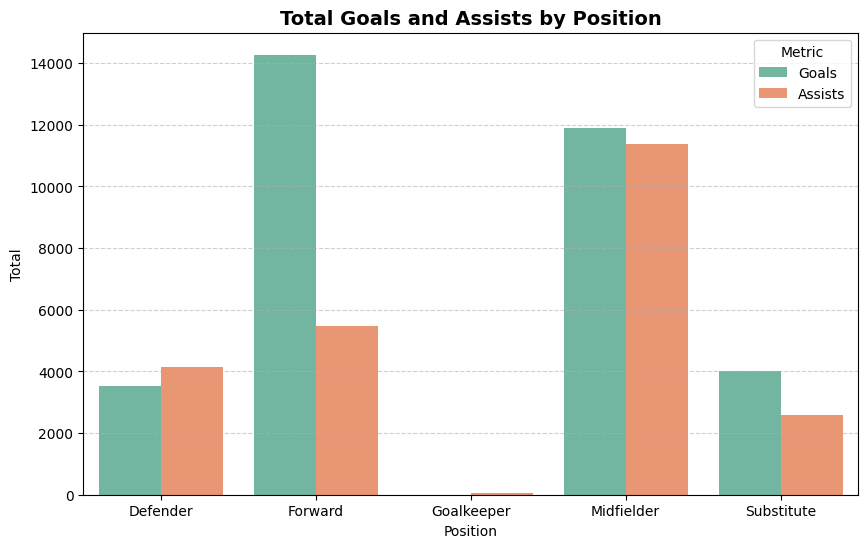

In [ ]:
position_stats = merged_df.groupby('Position')[['Goals','Assists']].sum().reset_index()
melted = position_stats.melt(id_vars='Position', var_name='Metric', value_name='Total')

plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='Position', y='Total', hue='Metric', palette='Set2')
plt.title('Total Goals and Assists by Position', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-1782571991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_goals, x='Goals', y='Player Name', palette='Blues_r')


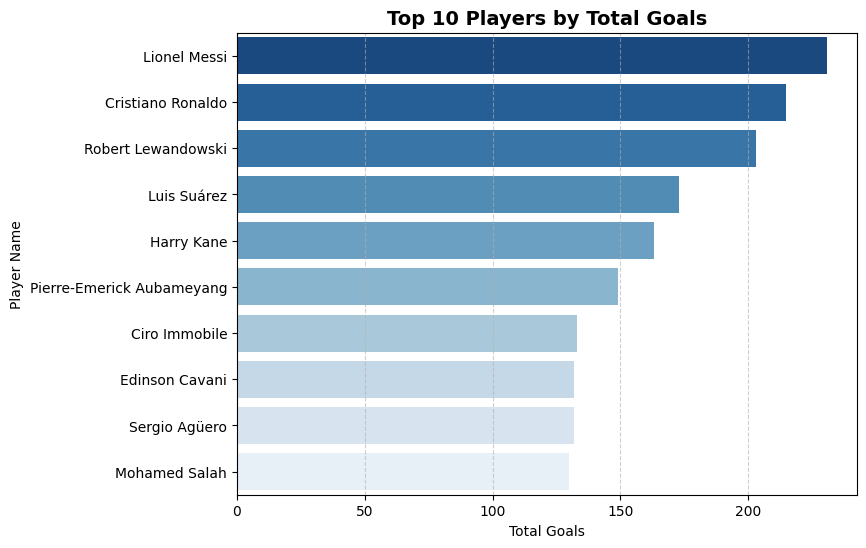

In [ ]:
# Calculate total goals per player
top10_goals = (
    merged_df.groupby('Player Name')['Goals'].sum().sort_values(ascending=False).head(10).reset_index())

plt.figure(figsize=(8,6))
sns.barplot(data=top10_goals, x='Goals', y='Player Name', palette='Blues_r')
plt.title('Top 10 Players by Total Goals', fontsize=14, fontweight='bold')
plt.xlabel('Total Goals')
plt.ylabel('Player Name')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

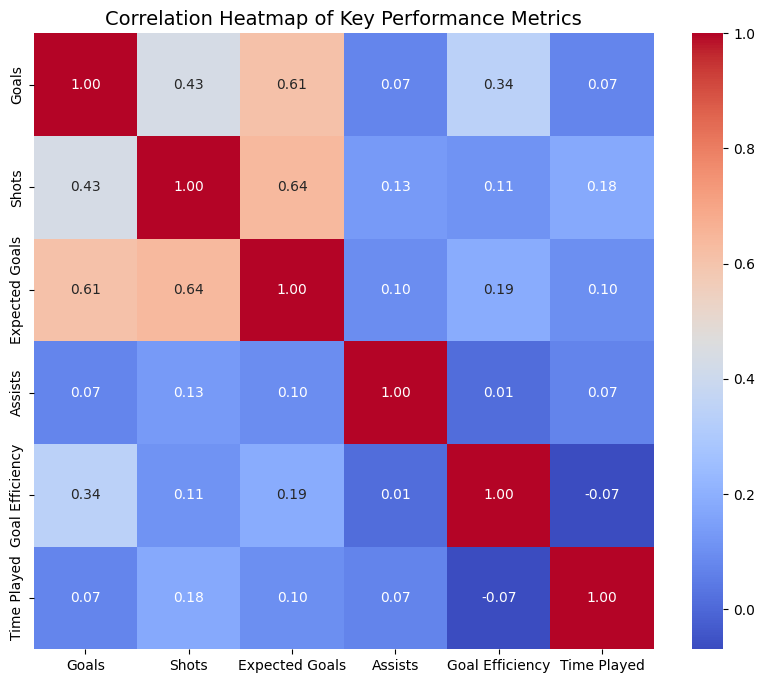

In [ ]:
# Key performance metrics
plt.figure(figsize=(10,8))
corr = merged_df[['Goals', 'Shots', 'Expected Goals', 'Assists', 'Goal Efficiency', 'Time Played']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Performance Metrics', fontsize=14)
plt.show()

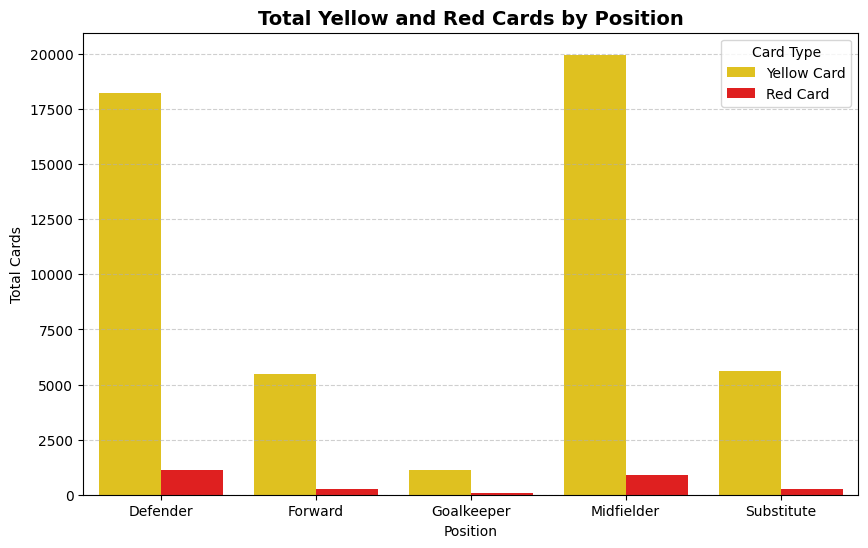

In [ ]:
discipline_totals = (
    merged_df.groupby('Position')[['Yellow Card', 'Red Card']]
    .sum()
    .reset_index()
)
melted_totals = discipline_totals.melt(
    id_vars='Position', value_vars=['Yellow Card', 'Red Card'],
    var_name='Card Type', value_name='Total'
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=melted_totals, x='Position', y='Total', hue='Card Type', palette=['gold','red'])
plt.title('Total Yellow and Red Cards by Position', fontsize=14, fontweight='bold')
plt.xlabel('Position'); plt.ylabel('Total Cards')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Card Type')
plt.show()

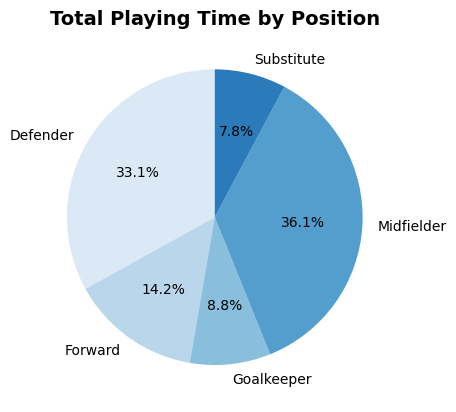

In [ ]:
time_by_position = merged_df.groupby('Position')['Time Played'].sum()
time_by_position.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Total Playing Time by Position', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()



```
# This is formatted as code
```

## 5️⃣ Data Insights

- Summarize your main takeaways. What patterns or trends did you find?